## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
# import math
import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Retrieve the Data from csv file**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLDataset/CreditScore - Copy.csv')

## **Display the DataFrame**

In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## **Check the shape of the DataFrame**

In [5]:
df.shape

(5000, 28)

## **Check Information about the DataFrame**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5000 non-null   int64  
 1   Customer_ID               5000 non-null   int64  
 2   Month                     5000 non-null   int64  
 3   Name                      5000 non-null   object 
 4   Age                       5000 non-null   int64  
 5   SSN                       2992 non-null   float64
 6   Occupation                5000 non-null   object 
 7   Annual_Income             5000 non-null   float64
 8   Monthly_Inhand_Salary     5000 non-null   float64
 9   Num_Bank_Accounts         5000 non-null   int64  
 10  Num_Credit_Card           5000 non-null   int64  
 11  Interest_Rate             5000 non-null   int64  
 12  Num_of_Loan               5000 non-null   int64  
 13  Type_of_Loan              5000 non-null   object 
 14  Delay_fr

## **Check the Description of the DataFrame**

In [7]:
# Returns the description of the numerical columns
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,2.992000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,4766.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,9381.500000,26089.587200,4.500000,32.599200,4.254078e+08,50631.923632,4212.850930,5.343000,5.479000,14.358400,...,19.679606,13.326400,10.496744,5.777800,1431.563408,32.314254,221.764000,104.770621,56.075463,396.010311
std,2165.278489,14352.187019,2.291517,10.614212,3.031410e+08,38364.042964,3182.221120,2.639004,2.019102,8.875635,...,12.332723,6.327865,6.748481,3.970892,1194.961404,5.163621,98.171284,127.765275,39.929770,206.442406
min,5634.000000,1030.000000,1.000000,14.000000,9.242860e+05,7103.035000,468.770000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,24.730000,20.172942,1.000000,0.000000,0.000000,0.688299
25%,7507.750000,14023.000000,2.750000,23.000000,1.475443e+08,19758.840000,1670.771667,3.000000,4.000000,7.000000,...,10.000000,8.000000,5.320000,2.000000,518.400000,27.979514,149.000000,27.394667,28.057672,268.281603
50%,9381.500000,25876.000000,4.500000,32.000000,3.787995e+08,36591.250000,3059.936667,6.000000,5.000000,13.000000,...,17.000000,14.000000,9.500000,5.000000,1126.350000,32.375498,220.000000,65.008174,44.458686,337.798921
75%,11255.250000,39249.000000,6.250000,41.000000,6.983128e+08,70112.780000,5886.687500,8.000000,7.000000,20.000000,...,27.000000,18.000000,15.060000,8.000000,2019.510000,36.611476,303.000000,138.541977,73.600929,460.750370
max,13129.000000,50979.000000,8.000000,56.000000,9.984789e+08,177243.920000,14710.533330,10.000000,11.000000,34.000000,...,54.000000,25.000000,29.940000,17.000000,4984.820000,47.969560,404.000000,1320.549063,237.918381,1183.930696


## **Data Pre-processing**

## Check for Duplicate data

In [8]:
df.duplicated().sum()

0

## Check **(?, No Data and Not Specified)** value and replace with **nan** in the DataFrame

In [9]:
(df['Occupation'] == '?').sum()

3112

In [10]:
df['Occupation'] = df['Occupation'].replace('?', np.nan)

In [11]:
(df['Type_of_Loan'] == "No Data").sum()

632

In [12]:
(df['Type_of_Loan'] == 'Not Specified').sum()

56

In [13]:
df['Type_of_Loan'] = df['Type_of_Loan'].replace(['No Data', 'Not Specified'], np.nan)

## Check for null values in the DataFrame

<Axes: >

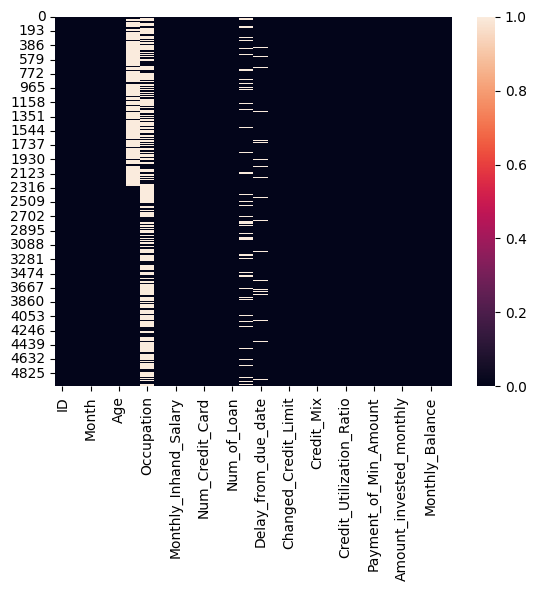

In [14]:
sns.heatmap(df.isnull())

## Display Null Values Percentage for each column

In [15]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)

Occupation                  62.24
SSN                         40.16
Type_of_Loan                13.76
Delay_from_due_date          4.68
Changed_Credit_Limit         0.00
Monthly_Balance              0.00
Payment_Behaviour            0.00
Amount_invested_monthly      0.00
Total_EMI_per_month          0.00
Payment_of_Min_Amount        0.00
Credit_History_Age           0.00
Credit_Utilization_Ratio     0.00
Outstanding_Debt             0.00
Credit_Mix                   0.00
Num_Credit_Inquiries         0.00
ID                           0.00
Num_of_Delayed_Payment       0.00
Customer_ID                  0.00
Num_of_Loan                  0.00
Interest_Rate                0.00
Num_Credit_Card              0.00
Num_Bank_Accounts            0.00
Monthly_Inhand_Salary        0.00
Annual_Income                0.00
Age                          0.00
Name                         0.00
Month                        0.00
Credit_Score                 0.00
dtype: float64

## Drop Non-Numerical Null value columns from the DataFrame

In [16]:
df.drop(['Occupation', 'Type_of_Loan'], axis=1, inplace=True)

In [17]:
df.shape

(5000, 26)

## Impute Numerical Null value Columns with Mean

In [18]:
df['SSN'] = df['SSN'].fillna(df['SSN'].mean())
df['Delay_from_due_date'] = df['Delay_from_due_date'].fillna(df['Delay_from_due_date'].mean())

<Axes: >

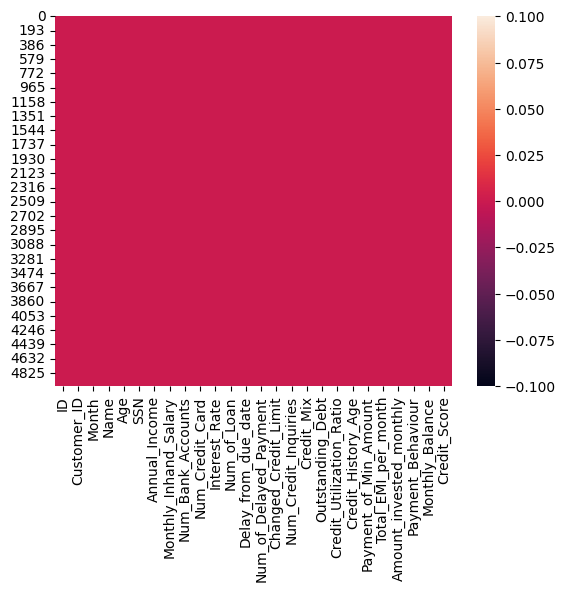

In [19]:
sns.heatmap(df.isnull())

## Visualize the target(output) variable

<Axes: >

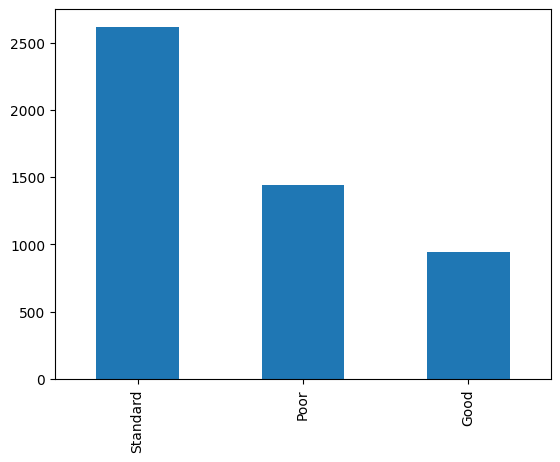

In [20]:
df['Credit_Score'].value_counts().plot(kind='bar')

## Set the variable for LabelEncoder

In [21]:
le = LabelEncoder()

## Encode output variable

In [22]:
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

## Visualize the target(output) variable with Encode value

<Axes: >

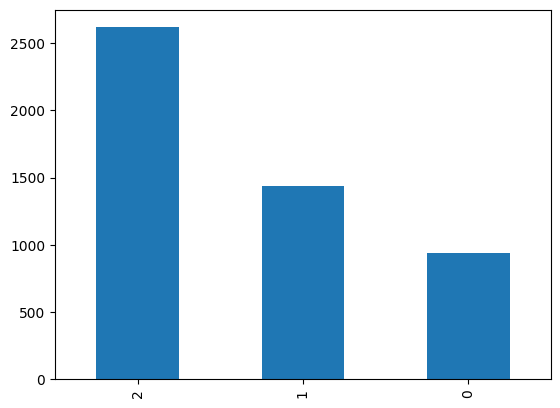

In [23]:
df['Credit_Score'].value_counts().plot(kind='bar')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5000 non-null   int64  
 1   Customer_ID               5000 non-null   int64  
 2   Month                     5000 non-null   int64  
 3   Name                      5000 non-null   object 
 4   Age                       5000 non-null   int64  
 5   SSN                       5000 non-null   float64
 6   Annual_Income             5000 non-null   float64
 7   Monthly_Inhand_Salary     5000 non-null   float64
 8   Num_Bank_Accounts         5000 non-null   int64  
 9   Num_Credit_Card           5000 non-null   int64  
 10  Interest_Rate             5000 non-null   int64  
 11  Num_of_Loan               5000 non-null   int64  
 12  Delay_from_due_date       5000 non-null   float64
 13  Num_of_Delayed_Payment    5000 non-null   int64  
 14  Changed_

## Encode Non-Numerical Column value

In [25]:
df['Name'] = le.fit_transform(df['Name'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])
df['Payment_of_Min_Amount'] = le.fit_transform(df['Payment_of_Min_Amount'])
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5000 non-null   int64  
 1   Customer_ID               5000 non-null   int64  
 2   Month                     5000 non-null   int64  
 3   Name                      5000 non-null   int64  
 4   Age                       5000 non-null   int64  
 5   SSN                       5000 non-null   float64
 6   Annual_Income             5000 non-null   float64
 7   Monthly_Inhand_Salary     5000 non-null   float64
 8   Num_Bank_Accounts         5000 non-null   int64  
 9   Num_Credit_Card           5000 non-null   int64  
 10  Interest_Rate             5000 non-null   int64  
 11  Num_of_Loan               5000 non-null   int64  
 12  Delay_from_due_date       5000 non-null   float64
 13  Num_of_Delayed_Payment    5000 non-null   int64  
 14  Changed_

## Visualize the Encoded columns

<Axes: >

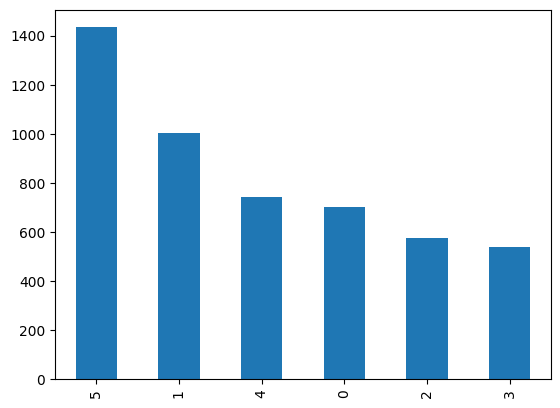

In [27]:
df['Payment_Behaviour'].value_counts().plot(kind='bar')

<Axes: >

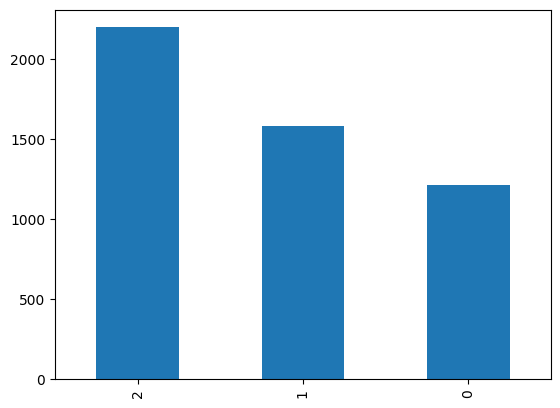

In [28]:
df['Credit_Mix'].value_counts().plot(kind='bar')

<Axes: >

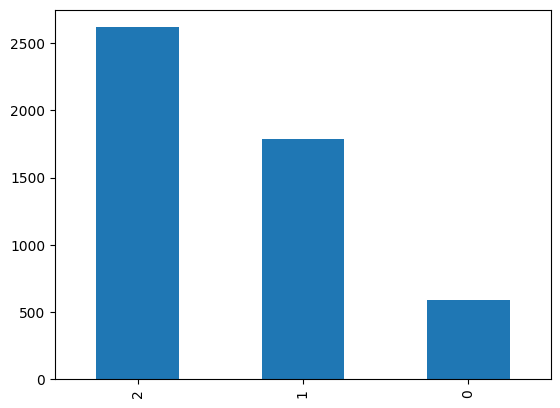

In [29]:
df['Payment_of_Min_Amount'].value_counts().plot(kind='bar')

## **Separate Dependent and Independent Variables**

In [30]:
# get all the Independent Variables
X = df.drop(columns=['Credit_Score'])

In [31]:
# get the target(output) variable
y = df['Credit_Score']

## **Split the data into train and test**

In [32]:
# Split the Data into train and test using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Classification Methods**

## Logistic Regression

In [33]:
def Logis_reg(X_train, X_test, y_train, y_test):
  logReg = LogisticRegression()
  logReg.fit(X_train, y_train)
  y_pred = logReg.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

## Gaussian Naive Bayes Classifier

In [34]:
def gaus_class(X_train, X_test, y_train, y_test):
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

## Support Vector Classifier

In [35]:
def svcWithOutParam(X_train, X_test, y_train, y_test):
  svc = SVC()
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

In [36]:
def svcWithGamma(X_train, X_test, y_train, y_test):
  svc = SVC(gamma='auto')
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

## **Evaluate the Model with Original Data**

In [37]:
print("Logistic Regression:")
Logis_reg(X_train, X_test, y_train, y_test)
print("Gaussian Naive Bayes Classifier:")
gaus_class(X_train, X_test, y_train, y_test)
print("Support Vector Classifier - without Gamma")
svcWithOutParam(X_train, X_test, y_train, y_test)
print("Support Vector Classifier - with Gamma")
svcWithGamma(X_train, X_test, y_train, y_test)

Logistic Regression:
[[  0   0 195]
 [  0   0 293]
 [  0   0 512]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.00      0.00      0.00       293
           2       0.51      1.00      0.68       512

    accuracy                           0.51      1000
   macro avg       0.17      0.33      0.23      1000
weighted avg       0.26      0.51      0.35      1000

Gaussian Naive Bayes Classifier:
[[ 38  15 142]
 [  2  40 251]
 [ 42  34 436]]
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       195
           1       0.45      0.14      0.21       293
           2       0.53      0.85      0.65       512

    accuracy                           0.51      1000
   macro avg       0.48      0.39      0.38      1000
weighted avg       0.49      0.51      0.45      1000

Support Vector Classifier - without Gamma


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0 195]
 [  0   0 293]
 [  0   0 512]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       0.00      0.00      0.00       293
           2       0.51      1.00      0.68       512

    accuracy                           0.51      1000
   macro avg       0.17      0.33      0.23      1000
weighted avg       0.26      0.51      0.35      1000

Support Vector Classifier - with Gamma


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0   0 195]
 [  0   2 291]
 [  0   0 512]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       195
           1       1.00      0.01      0.01       293
           2       0.51      1.00      0.68       512

    accuracy                           0.51      1000
   macro avg       0.50      0.34      0.23      1000
weighted avg       0.56      0.51      0.35      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Scaling the Original Data**

**Standard Scaler**

In [38]:
std = StandardScaler()
X_std = std.fit_transform(X)

# split the data into train and test
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size = 0.25, random_state = 42)

**Evaluate the Data with Standard Scaler**

In [39]:
print("Logistic Regression:")
Logis_reg(X_train_std, X_test_std, y_train, y_test)
print("Gaussian Naive Bayes Classifier:")
gaus_class(X_train_std, X_test_std, y_train, y_test)
print("Support Vector Classifier - without Gamma")
svcWithOutParam(X_train_std, X_test_std, y_train, y_test)
print("Support Vector Classifier - with Gamma")
svcWithGamma(X_train_std, X_test_std, y_train, y_test)

Logistic Regression:
[[153   6  73]
 [ 27 187 159]
 [ 85 105 455]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       232
           1       0.63      0.50      0.56       373
           2       0.66      0.71      0.68       645

    accuracy                           0.64      1250
   macro avg       0.62      0.62      0.62      1250
weighted avg       0.64      0.64      0.63      1250

Gaussian Naive Bayes Classifier:
[[188   9  35]
 [ 58 266  49]
 [154 147 344]]
              precision    recall  f1-score   support

           0       0.47      0.81      0.59       232
           1       0.63      0.71      0.67       373
           2       0.80      0.53      0.64       645

    accuracy                           0.64      1250
   macro avg       0.63      0.69      0.64      1250
weighted avg       0.69      0.64      0.64      1250

Support Vector Classifier - without Gamma
[[186   2  44]
 [ 28 261  84]
 [ 86  73 486]]
    

**MinMax Scaling**

In [40]:
min_max = MinMaxScaler()
X_mm = min_max.fit_transform(X)

X_train_mm, X_test_mm, y_train, y_test = train_test_split(X_mm, y, test_size = 0.25, random_state = 42)

**Evaluate the Data with MinMax Scaling**

In [41]:
print("Logistic Regression:")
Logis_reg(X_train_mm, X_test_mm, y_train, y_test)
print("Gaussian Naive Bayes Classifier:")
gaus_class(X_train_mm, X_test_mm, y_train, y_test)
print("Support Vector Classifier - without Gamma")
svcWithOutParam(X_train_mm, X_test_mm, y_train, y_test)
print("Support Vector Classifier - with Gamma")
svcWithGamma(X_train_mm, X_test_mm, y_train, y_test)

Logistic Regression:
[[150   6  76]
 [ 27 179 167]
 [ 85 101 459]]
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       232
           1       0.63      0.48      0.54       373
           2       0.65      0.71      0.68       645

    accuracy                           0.63      1250
   macro avg       0.62      0.61      0.61      1250
weighted avg       0.63      0.63      0.63      1250

Gaussian Naive Bayes Classifier:
[[188   9  35]
 [ 58 266  49]
 [154 147 344]]
              precision    recall  f1-score   support

           0       0.47      0.81      0.59       232
           1       0.63      0.71      0.67       373
           2       0.80      0.53      0.64       645

    accuracy                           0.64      1250
   macro avg       0.63      0.69      0.64      1250
weighted avg       0.69      0.64      0.64      1250

Support Vector Classifier - without Gamma


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[184   2  46]
 [ 43 246  84]
 [100  82 463]]
              precision    recall  f1-score   support

           0       0.56      0.79      0.66       232
           1       0.75      0.66      0.70       373
           2       0.78      0.72      0.75       645

    accuracy                           0.71      1250
   macro avg       0.70      0.72      0.70      1250
weighted avg       0.73      0.71      0.72      1250

Support Vector Classifier - with Gamma
[[179   9  44]
 [ 59 216  98]
 [130 129 386]]
              precision    recall  f1-score   support

           0       0.49      0.77      0.60       232
           1       0.61      0.58      0.59       373
           2       0.73      0.60      0.66       645

    accuracy                           0.62      1250
   macro avg       0.61      0.65      0.62      1250
weighted avg       0.65      0.62      0.63      1250



## **Feature selection using correlation matrix**

In [44]:
df.corr()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,1.000000,-1.954565e-02,1.058301e-03,-6.285786e-03,-0.004857,1.438669e-01,-2.717405e-02,-0.029466,-0.027597,0.039671,...,-3.552595e-02,-2.395503e-02,0.006565,-0.066435,0.000238,-0.076320,-3.426321e-02,0.022559,-0.013366,0.000804
Customer_ID,-0.019546,1.000000e+00,3.250003e-18,1.789478e-02,0.012914,-1.920862e-02,-3.367516e-02,-0.035252,0.012202,0.009910,...,-6.566079e-02,5.642968e-02,0.001780,-0.036507,0.002499,-0.037267,-4.334585e-02,0.020555,-0.002696,0.012330
Month,0.001058,3.250003e-18,1.000000e+00,-1.770636e-16,0.015832,-3.673821e-16,1.311248e-17,-0.001779,0.000711,0.000930,...,9.676471e-17,-1.144124e-16,0.005067,0.023146,-0.001263,0.046601,9.993111e-17,0.002473,-0.004127,-0.021693
Name,-0.006286,1.789478e-02,-1.770636e-16,1.000000e+00,0.011713,6.788881e-02,-1.656045e-02,-0.016112,0.042466,0.014264,...,-7.661471e-02,1.075779e-01,0.021058,-0.048869,0.059372,0.005636,-3.196744e-02,0.031328,-0.008155,0.015589
Age,-0.004857,1.291413e-02,1.583204e-02,1.171289e-02,1.000000,-4.312545e-03,-2.794994e-04,0.003936,-0.166051,-0.091895,...,1.061344e-01,-1.769203e-01,0.001086,0.211158,-0.127967,-0.150443,-2.475978e-03,0.010127,0.072348,-0.074146
SSN,0.143867,-1.920862e-02,-3.673821e-16,6.788881e-02,-0.004313,1.000000e+00,-3.431406e-02,-0.034065,-0.013726,-0.002877,...,-3.258090e-03,7.644114e-03,-0.004866,-0.044012,0.022872,-0.061753,-8.528448e-03,0.051301,-0.039467,-0.016151
Annual_Income,-0.027174,-3.367516e-02,1.311248e-17,-1.656045e-02,-0.000279,-3.431406e-02,1.000000e+00,0.998157,-0.263542,-0.217801,...,5.372062e-02,-2.158505e-01,0.182764,0.277322,-0.179057,0.458404,8.164683e-01,-0.323297,0.647821,-0.131297
Monthly_Inhand_Salary,-0.029466,-3.525161e-02,-1.778674e-03,-1.611193e-02,0.003936,-3.406487e-02,9.981569e-01,1.000000,-0.264684,-0.221700,...,5.376391e-02,-2.210510e-01,0.182328,0.278384,-0.182084,0.441890,8.186332e-01,-0.324389,0.650205,-0.132084
Num_Bank_Accounts,-0.027597,1.220164e-02,7.112006e-04,4.246584e-02,-0.166051,-1.372611e-02,-2.635417e-01,-0.264684,1.000000,0.394324,...,-2.189922e-01,5.232181e-01,-0.063209,-0.467661,0.359767,0.120695,-2.073384e-01,0.078491,-0.306618,0.195651
Num_Credit_Card,0.039671,9.909603e-03,9.295525e-04,1.426410e-02,-0.091895,-2.877006e-03,-2.178013e-01,-0.221700,0.394324,1.000000,...,-3.214975e-01,4.853315e-01,-0.065103,-0.400863,0.248153,0.096324,-1.829931e-01,0.087833,-0.266478,0.101762


In [45]:
cor = df.corr()
cor_target = abs(cor["Credit_Score"])

In [46]:
# select the features based on the correlation matrix value
chosen_features = cor_target[cor_target>0.1]

In [47]:
chosen_features

Annual_Income              0.131297
Monthly_Inhand_Salary      0.132084
Num_Bank_Accounts          0.195651
Num_Credit_Card            0.101762
Interest_Rate              0.144444
Num_of_Loan                0.125613
Delay_from_due_date        0.155115
Num_of_Delayed_Payment     0.243352
Changed_Credit_Limit       0.228017
Num_Credit_Inquiries       0.104777
Credit_Mix                 0.238125
Credit_History_Age         0.146139
Payment_of_Min_Amount      0.214145
Amount_invested_monthly    0.109998
Monthly_Balance            0.117301
Credit_Score               1.000000
Name: Credit_Score, dtype: float64

In [48]:
# Convert the selected features into list
ls1 = list(chosen_features.index.values)

In [49]:
ls1

['Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

**Create the New DataFrame with Selected Features**

In [50]:
df_new = df[ls1]

In [51]:
df_new.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3,4,3,4,3.0,7,11.27,4,1,265,1,21.46538,312.494089,0
1,19114.12,1824.843333,3,4,3,4,3.0,4,11.27,4,1,266,1,21.46538,284.629163,0
2,19114.12,1824.843333,3,4,3,4,3.0,7,11.27,4,1,267,1,21.46538,331.209863,0
3,19114.12,1824.843333,3,4,3,4,5.0,4,6.27,4,1,268,1,21.46538,223.451310,0
4,19114.12,1824.843333,3,4,3,4,6.0,4,11.27,4,1,269,1,21.46538,341.489231,0


**Separate the Dependent and Independent Variable (Selected Features)**

In [52]:
X_feat = df_new.drop(columns=['Credit_Score'])
y = df['Credit_Score']

**Split the Data into Train and Test (Selected Features)**

In [53]:
X_train_feat, X_test_feat, y_train, y_test = train_test_split(X_feat, y, test_size = 0.25, random_state = 42)

**Evaluate the model with Selected Features**

In [54]:
print("Logistic Regression:")
Logis_reg(X_train_feat, X_test_feat, y_train, y_test)
print("Gaussian Naive Bayes Classifier:")
gaus_class(X_train_feat, X_test_feat, y_train, y_test)
print("Support Vector Classifier - without Gamma")
svcWithOutParam(X_train_feat, X_test_feat, y_train, y_test)
print("Support Vector Classifier - with Gamma")
svcWithGamma(X_train_feat, X_test_feat, y_train, y_test)

Logistic Regression:
[[ 66   5 161]
 [ 11 116 246]
 [ 68 115 462]]
              precision    recall  f1-score   support

           0       0.46      0.28      0.35       232
           1       0.49      0.31      0.38       373
           2       0.53      0.72      0.61       645

    accuracy                           0.52      1250
   macro avg       0.49      0.44      0.45      1250
weighted avg       0.51      0.52      0.49      1250

Gaussian Naive Bayes Classifier:
[[178  10  44]
 [ 53 269  51]
 [192 156 297]]
              precision    recall  f1-score   support

           0       0.42      0.77      0.54       232
           1       0.62      0.72      0.67       373
           2       0.76      0.46      0.57       645

    accuracy                           0.60      1250
   macro avg       0.60      0.65      0.59      1250
weighted avg       0.65      0.60      0.60      1250

Support Vector Classifier - without Gamma


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[  0   0 232]
 [  0   0 373]
 [  0   0 645]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       232
           1       0.00      0.00      0.00       373
           2       0.52      1.00      0.68       645

    accuracy                           0.52      1250
   macro avg       0.17      0.33      0.23      1250
weighted avg       0.27      0.52      0.35      1250

Support Vector Classifier - with Gamma


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  2   0 230]
 [  0  15 358]
 [  0   1 644]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       232
           1       0.94      0.04      0.08       373
           2       0.52      1.00      0.69       645

    accuracy                           0.53      1250
   macro avg       0.82      0.35      0.26      1250
weighted avg       0.74      0.53      0.38      1250



**Scale the Data with Selected Features**

**Standard Scaler**

In [55]:
std = StandardScaler()
X_std_feat = std.fit_transform(X_feat)

X_train_std_feat, X_test_std_feat, y_train, y_test = train_test_split(X_std_feat, y, test_size = 0.25, random_state = 42)

In [56]:
print("Logistic Regression:")
Logis_reg(X_train_std_feat, X_test_std_feat, y_train, y_test)
print("Gaussian Naive Bayes Classifier:")
gaus_class(X_train_std_feat, X_test_std_feat, y_train, y_test)
print("Support Vector Classifier - without Gamma")
svcWithOutParam(X_train_std_feat, X_test_std_feat, y_train, y_test)
print("Support Vector Classifier - with Gamma")
svcWithGamma(X_train_std_feat, X_test_std_feat, y_train, y_test)

Logistic Regression:
[[144   6  82]
 [ 23 192 158]
 [ 86 102 457]]
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       232
           1       0.64      0.51      0.57       373
           2       0.66      0.71      0.68       645

    accuracy                           0.63      1250
   macro avg       0.62      0.61      0.62      1250
weighted avg       0.63      0.63      0.63      1250

Gaussian Naive Bayes Classifier:
[[179  10  43]
 [ 56 264  53]
 [144 152 349]]
              precision    recall  f1-score   support

           0       0.47      0.77      0.59       232
           1       0.62      0.71      0.66       373
           2       0.78      0.54      0.64       645

    accuracy                           0.63      1250
   macro avg       0.63      0.67      0.63      1250
weighted avg       0.68      0.63      0.64      1250

Support Vector Classifier - without Gamma
[[185   0  47]
 [ 39 247  87]
 [ 98  78 469]]
    

**MinMax Scaling**

In [57]:
min_max = MinMaxScaler()
X_mm_feat = min_max.fit_transform(X_feat)

X_train_mm_feat, X_test_mm_feat, y_train, y_test = train_test_split(X_mm_feat, y, test_size = 0.25, random_state = 42)

In [58]:
print("Logistic Regression:")
Logis_reg(X_train_mm_feat, X_test_mm_feat, y_train, y_test)
print("Gaussian Naive Bayes Classifier:")
gaus_class(X_train_mm_feat, X_test_mm_feat, y_train, y_test)
print("Support Vector Classifier - without Gamma")
svcWithOutParam(X_train_mm_feat, X_test_mm_feat, y_train, y_test)
print("Support Vector Classifier - with Gamma")
svcWithGamma(X_train_mm_feat, X_test_mm_feat, y_train, y_test)

Logistic Regression:
[[148   6  78]
 [ 22 191 160]
 [ 86 103 456]]
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       232
           1       0.64      0.51      0.57       373
           2       0.66      0.71      0.68       645

    accuracy                           0.64      1250
   macro avg       0.62      0.62      0.62      1250
weighted avg       0.64      0.64      0.63      1250

Gaussian Naive Bayes Classifier:
[[179  10  43]
 [ 56 264  53]
 [144 152 349]]
              precision    recall  f1-score   support

           0       0.47      0.77      0.59       232
           1       0.62      0.71      0.66       373
           2       0.78      0.54      0.64       645

    accuracy                           0.63      1250
   macro avg       0.63      0.67      0.63      1250
weighted avg       0.68      0.63      0.64      1250

Support Vector Classifier - without Gamma
[[187   0  45]
 [ 54 225  94]
 [112  75 458]]
    